# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 
from sklearn.linear_model import LinearRegression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | ayan
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | saint-georges
Processing Record 6 of Set 1 | weston
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | eldorado
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | bitkine
Processing Record 16 of Set 1 | kaeo
Processing Record 17 of Set 1 | phan thiet
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | virginia beach
Processing Record 20 of Set 1 | srikakulam
Processing Record 21 of Set 1 | new norfolk
Processin

Processing Record 35 of Set 4 | bay-khaak
Processing Record 36 of Set 4 | cherskiy
Processing Record 37 of Set 4 | kang
Processing Record 38 of Set 4 | soe
Processing Record 39 of Set 4 | el dorado
Processing Record 40 of Set 4 | arraial do cabo
Processing Record 41 of Set 4 | dakar
Processing Record 42 of Set 4 | mabaruma
Processing Record 43 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 4 | beyneu
Processing Record 45 of Set 4 | cervo
Processing Record 46 of Set 4 | sulangan
Processing Record 47 of Set 4 | manakara
Processing Record 48 of Set 4 | azul
Processing Record 49 of Set 4 | berlevag
Processing Record 0 of Set 5 | inuvik
Processing Record 1 of Set 5 | quatre cocos
Processing Record 2 of Set 5 | hirara
Processing Record 3 of Set 5 | grindavik
Processing Record 4 of Set 5 | saldanha
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | korla
Processing Record 7 of Set 5 | russell
Processing Record 8 of Set 5 | komyshuvakha
Processing

Processing Record 26 of Set 8 | saint-pierre
Processing Record 27 of Set 8 | sao filipe
Processing Record 28 of Set 8 | kutum
Processing Record 29 of Set 8 | victoria
Processing Record 30 of Set 8 | manuk mangkaw
Processing Record 31 of Set 8 | labuhan
Processing Record 32 of Set 8 | oktyabrskoye
Processing Record 33 of Set 8 | provideniya
Processing Record 34 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 35 of Set 8 | broome
Processing Record 36 of Set 8 | okha
Processing Record 37 of Set 8 | severnyy
Processing Record 38 of Set 8 | tinskoy
Processing Record 39 of Set 8 | adrar
Processing Record 40 of Set 8 | mombaca
Processing Record 41 of Set 8 | santa fe
Processing Record 42 of Set 8 | ialibu
Processing Record 43 of Set 8 | aflu
City not found. Skipping...
Processing Record 44 of Set 8 | pudozh
Processing Record 45 of Set 8 | findlay
Processing Record 46 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 47 of Set 8 | petrolia
Processing Record 48 of Set 

Processing Record 17 of Set 12 | lincoln
Processing Record 18 of Set 12 | san cristobal
Processing Record 19 of Set 12 | ixtapa
Processing Record 20 of Set 12 | buala
Processing Record 21 of Set 12 | sungairaya
Processing Record 22 of Set 12 | leo
Processing Record 23 of Set 12 | northam
Processing Record 24 of Set 12 | sompeta
Processing Record 25 of Set 12 | atikokan
Processing Record 26 of Set 12 | zhangjiakou
Processing Record 27 of Set 12 | harper
Processing Record 28 of Set 12 | florianopolis
Processing Record 29 of Set 12 | ha tinh
Processing Record 30 of Set 12 | cojumatlan
City not found. Skipping...
Processing Record 31 of Set 12 | eenhana
Processing Record 32 of Set 12 | sahibganj
Processing Record 33 of Set 12 | kaka
Processing Record 34 of Set 12 | palimbang
Processing Record 35 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 36 of Set 12 | alta floresta
Processing Record 37 of Set 12 | whitehorse
Processing Record 38 of Set 12 | waipawa
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-20.71,65,100,4.63,CA,1670205320
1,ayan,56.4500,138.1667,-13.74,58,100,5.68,RU,1670205605
2,kruisfontein,-34.0033,24.7314,14.02,86,97,3.44,ZA,1670205606
3,saint-georges,12.0564,-61.7485,24.05,83,54,1.96,GD,1670205607
4,weston,26.1004,-80.3998,24.43,77,95,3.40,US,1670205606


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-20.71,65,100,4.63,CA,1670205320
1,ayan,56.4500,138.1667,-13.74,58,100,5.68,RU,1670205605
2,kruisfontein,-34.0033,24.7314,14.02,86,97,3.44,ZA,1670205606
3,saint-georges,12.0564,-61.7485,24.05,83,54,1.96,GD,1670205607
4,weston,26.1004,-80.3998,24.43,77,95,3.40,US,1670205606


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

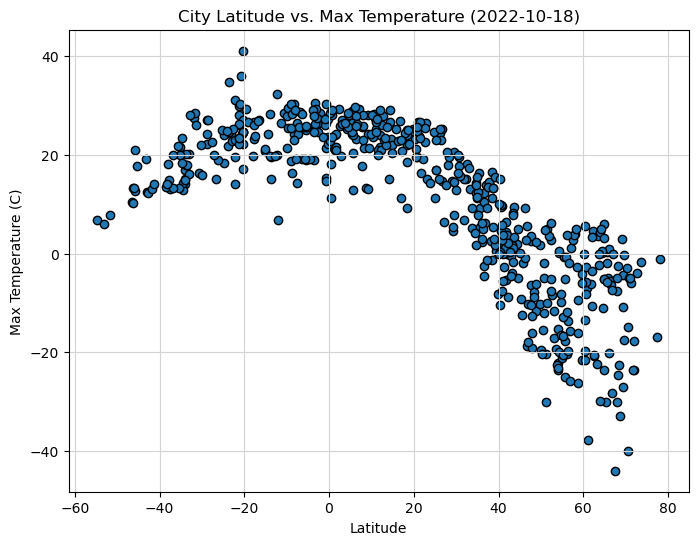

In [10]:
# Build scatter plot for latitude vs. temperature
plt.rcParams['figure.figsize'] = [8, 6]
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="tab:blue")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Incorporate the other graph properties
plt.grid (which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

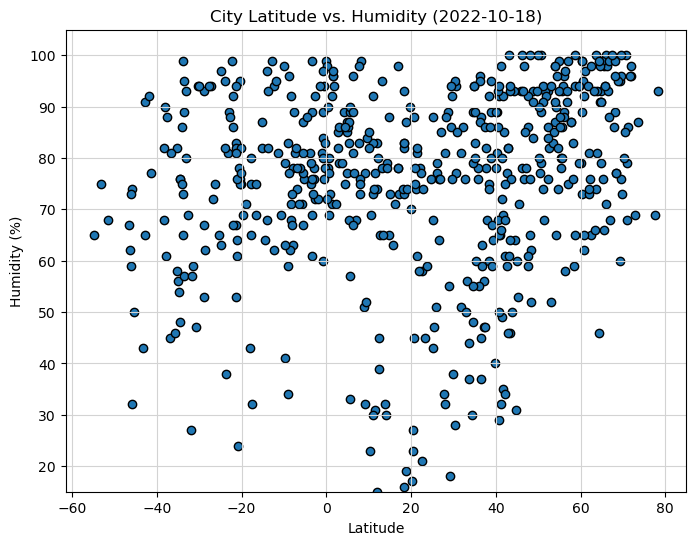

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="tab:blue")

plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate the other graph properties
plt.ylim(15,105)
plt.grid (which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

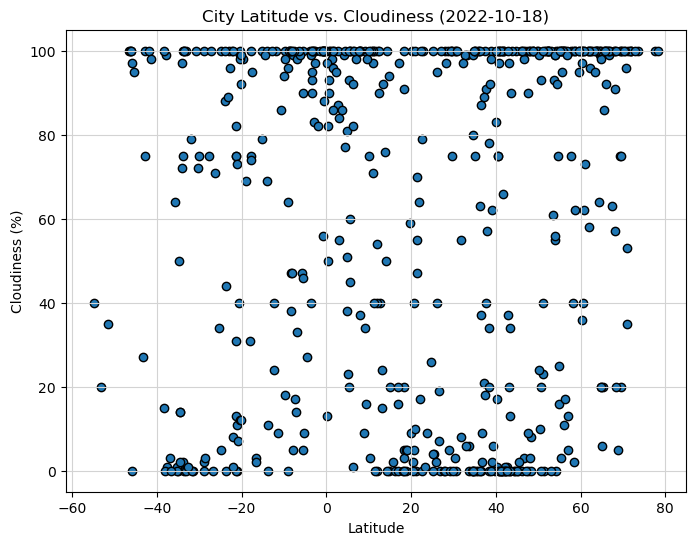

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="tab:blue")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate the other graph properties
plt.grid (which="major",axis="both",linestyle="-",color="lightgray")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

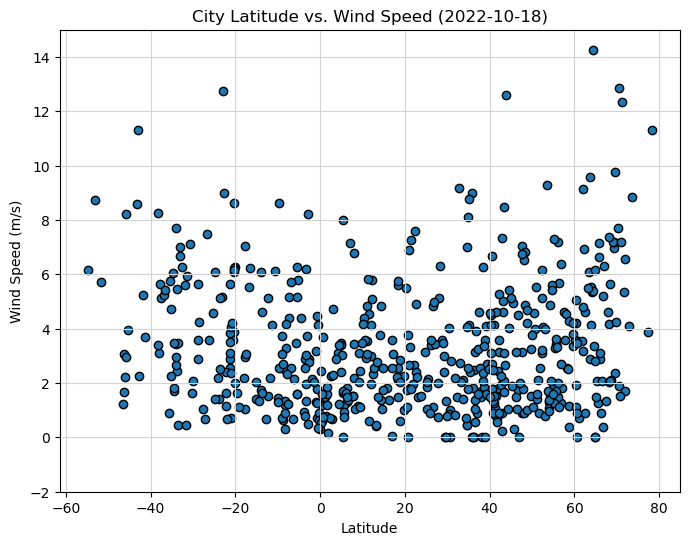

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="tab:blue")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
plt.ylim(-2,15)
plt.grid (which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

LR_city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
LR_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-20.71,65,100,4.63,CA,1670205320
1,ayan,56.4500,138.1667,-13.74,58,100,5.68,RU,1670205605
2,kruisfontein,-34.0033,24.7314,14.02,86,97,3.44,ZA,1670205606
3,saint-georges,12.0564,-61.7485,24.05,83,54,1.96,GD,1670205607
4,weston,26.1004,-80.3998,24.43,77,95,3.40,US,1670205606


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = LR_city_data_df[LR_city_data_df['Lat'] > 0]
print(len(northern_hemi_df))

# Display sample data
northern_hemi_df.head()

393


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-20.71,65,100,4.63,CA,1670205320
1,ayan,56.4500,138.1667,-13.74,58,100,5.68,RU,1670205605
3,saint-georges,12.0564,-61.7485,24.05,83,54,1.96,GD,1670205607
4,weston,26.1004,-80.3998,24.43,77,95,3.40,US,1670205606
5,norman wells,65.2820,-126.8329,-29.98,76,20,2.06,CA,1670205394


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = LR_city_data_df[LR_city_data_df['Lat'] < 0]
print(len(southern_hemi_df))

# Display sample data
southern_hemi_df.head()

166


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kruisfontein,-34.0033,24.7314,14.02,86,97,3.44,ZA,1670205606
6,east london,-33.0153,27.9116,20.06,93,100,7.02,ZA,1670205363
7,hobart,-42.8794,147.3294,12.37,91,75,11.32,AU,1670205584
8,carnarvon,-24.8667,113.6333,23.89,63,5,6.07,AU,1670205609
10,eldorado,-23.7869,-54.2836,21.71,95,88,1.41,BR,1670205610


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: City_ID
0      62.46
1      56.45
3      12.06
4      26.10
5      65.28
       ...  
553    38.73
554    30.33
555    58.57
556    58.69
558    59.65
Name: Lat, Length: 393, dtype: float64


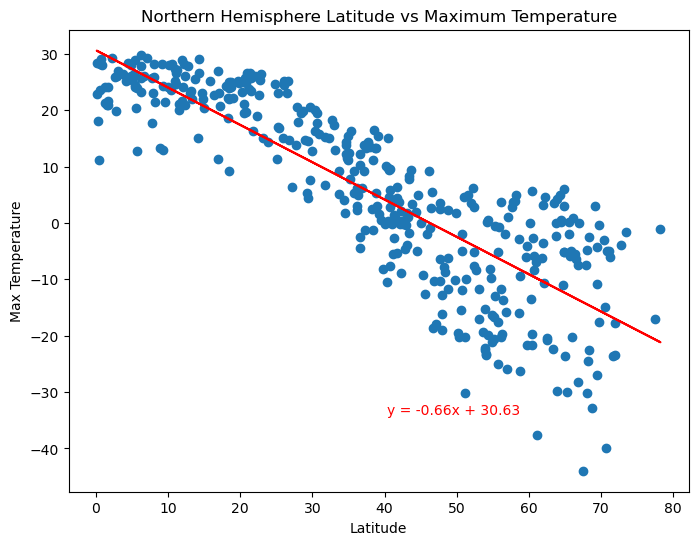

<Figure size 800x600 with 0 Axes>

In [17]:
# Linear regression on Northern Hemisphere
 
#Setting the data sets to compare
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# equation appears on the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")


annotate_x = x_values.median()
annotate_y = y_values.min() + 10
plt.annotate(line_eq, (annotate_x, annotate_y), color='red')

rv = round ((northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])[0],2)

print(f"The r-value is: {rv}")
# print(f "The the regression equation is: {line_eq}")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Northern Hemisphere Latitude vs Maximum Temperature')
plt.show()


# Save the figure
plt.savefig("output_data/Fig1.png")

  

The r-value is: City_ID
2     -34.00
6     -33.02
7     -42.88
8     -24.87
10    -23.79
       ...  
541   -41.41
544    -5.56
545   -34.73
547   -13.73
557   -14.48
Name: Lat, Length: 166, dtype: float64


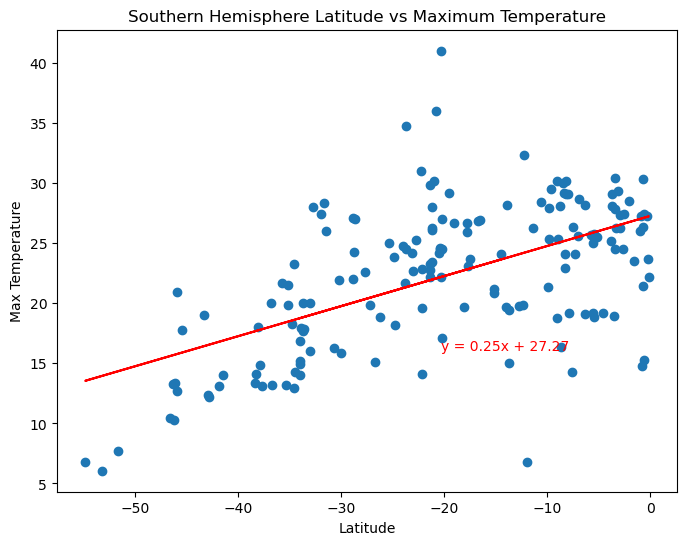

<Figure size 800x600 with 0 Axes>

In [18]:
# Linear regression on Southern Hemisphere
#Setting the data sets to compare
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# equation appears on the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")


annotate_x = x_values.median()
annotate_y = y_values.min() + 10
plt.annotate(line_eq, (annotate_x, annotate_y), color='red')

rv = round ((southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])[0],2)

print(f"The r-value is: {rv}")
# print(f "The the regression equation is: {line_eq}")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Southern Hemisphere Latitude vs Maximum Temperature')
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: City_ID
0      62.46
1      56.45
3      12.06
4      26.10
5      65.28
       ...  
553    38.73
554    30.33
555    58.57
556    58.69
558    59.65
Name: Lat, Length: 393, dtype: float64


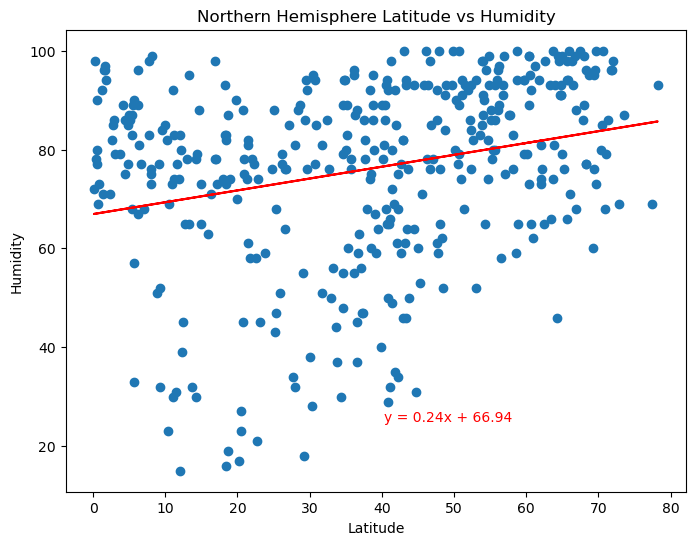

<Figure size 800x600 with 0 Axes>

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# equation appears on the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")


annotate_x = x_values.median()
annotate_y = y_values.min() + 10
plt.annotate(line_eq, (annotate_x, annotate_y), color='red')

rv = round ((northern_hemi_df["Lat"], northern_hemi_df["Humidity"])[0],2)

print(f"The r-value is: {rv}")
# print(f "The the regression equation is: {line_eq}")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere Latitude vs Humidity')
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")


The r-value is: City_ID
2     -34.00
6     -33.02
7     -42.88
8     -24.87
10    -23.79
       ...  
541   -41.41
544    -5.56
545   -34.73
547   -13.73
557   -14.48
Name: Lat, Length: 166, dtype: float64


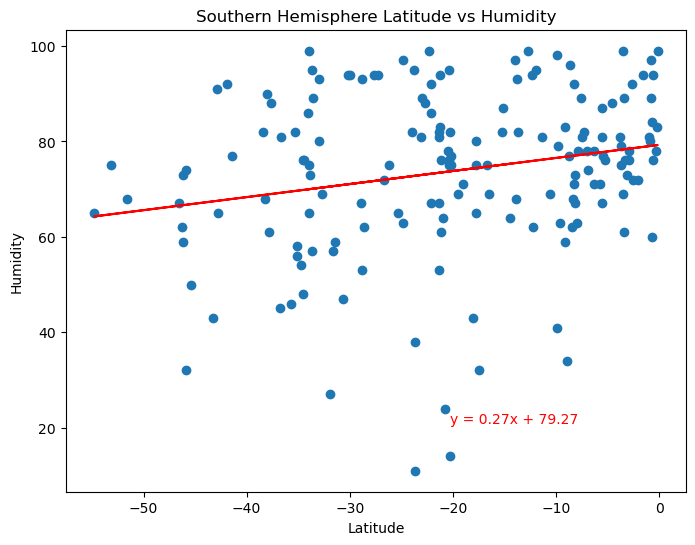

<Figure size 800x600 with 0 Axes>

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# equation appears on the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")


annotate_x = x_values.median()
annotate_y = y_values.min() + 10
plt.annotate(line_eq, (annotate_x, annotate_y), color='red')

rv = round ((southern_hemi_df["Lat"], southern_hemi_df["Humidity"])[0],2)

print(f"The r-value is: {rv}")
# print(f "The the regression equation is: {line_eq}")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere Latitude vs Humidity')
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: City_ID
0      62.46
1      56.45
3      12.06
4      26.10
5      65.28
       ...  
553    38.73
554    30.33
555    58.57
556    58.69
558    59.65
Name: Lat, Length: 393, dtype: float64


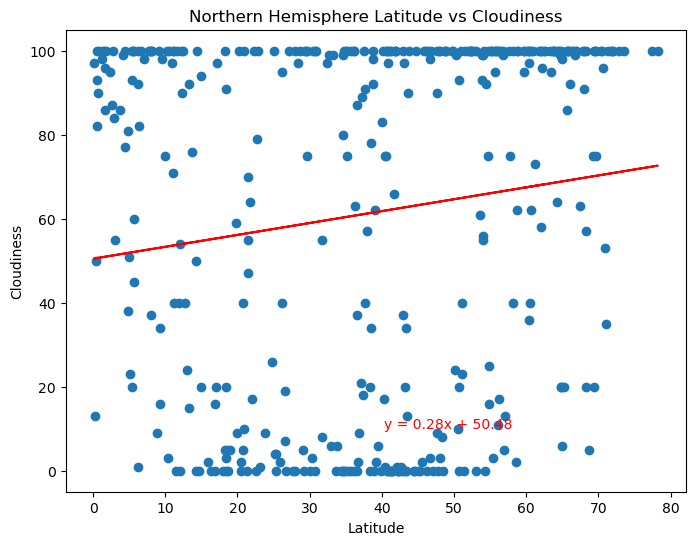

<Figure size 800x600 with 0 Axes>

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# equation appears on the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")


annotate_x = x_values.median()
annotate_y = y_values.min() + 10
plt.annotate(line_eq, (annotate_x, annotate_y), color='red')

rv = round ((northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])[0],2)

print(f"The r-value is: {rv}")
# print(f "The the regression equation is: {line_eq}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')
plt.show()

# Save the figure
plt.savefig("output_data/Fig5.png")


The r-value is: City_ID
2     -34.00
6     -33.02
7     -42.88
8     -24.87
10    -23.79
       ...  
541   -41.41
544    -5.56
545   -34.73
547   -13.73
557   -14.48
Name: Lat, Length: 166, dtype: float64


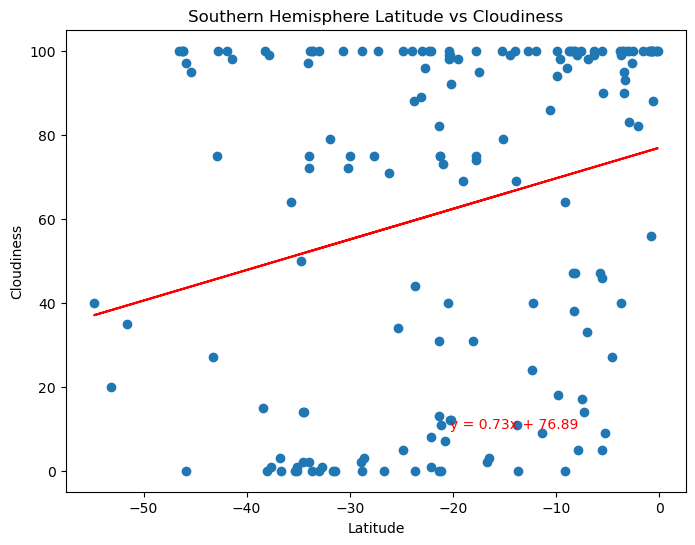

<Figure size 800x600 with 0 Axes>

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# equation appears on the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")


annotate_x = x_values.median()
annotate_y = y_values.min() + 10
plt.annotate(line_eq, (annotate_x, annotate_y), color='red')

rv = round ((southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])[0],2)

print(f"The r-value is: {rv}")
# print(f "The the regression equation is: {line_eq}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere Latitude vs Cloudiness')
plt.show()

# Save the figure
plt.savefig("output_data/Fig6.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: City_ID
0      62.46
1      56.45
3      12.06
4      26.10
5      65.28
       ...  
553    38.73
554    30.33
555    58.57
556    58.69
558    59.65
Name: Lat, Length: 393, dtype: float64


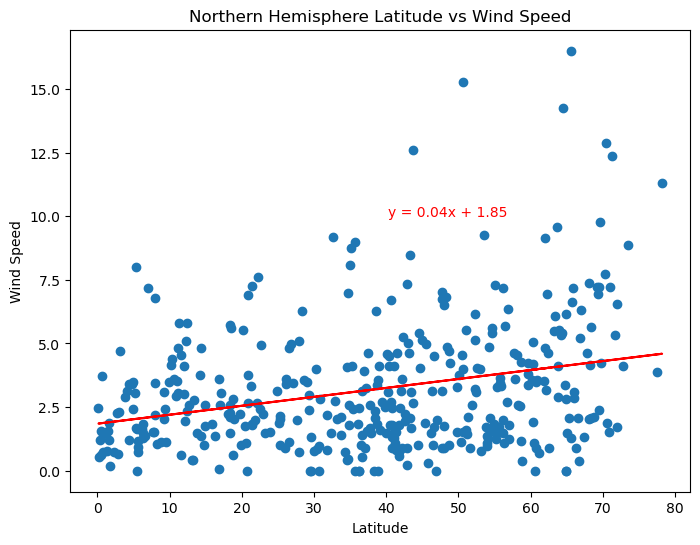

<Figure size 800x600 with 0 Axes>

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# equation appears on the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")


annotate_x = x_values.median()
annotate_y = y_values.min() + 10
plt.annotate(line_eq, (annotate_x, annotate_y), color='red')

rv = round ((northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])[0],2)

print(f"The r-value is: {rv}")
# print(f "The the regression equation is: {line_eq}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Hemisphere Latitude vs Wind Speed')
plt.show()


# Save the figure
plt.savefig("output_data/Fig7.png")


The r-value is: City_ID
2     -34.00
6     -33.02
7     -42.88
8     -24.87
10    -23.79
       ...  
541   -41.41
544    -5.56
545   -34.73
547   -13.73
557   -14.48
Name: Lat, Length: 166, dtype: float64


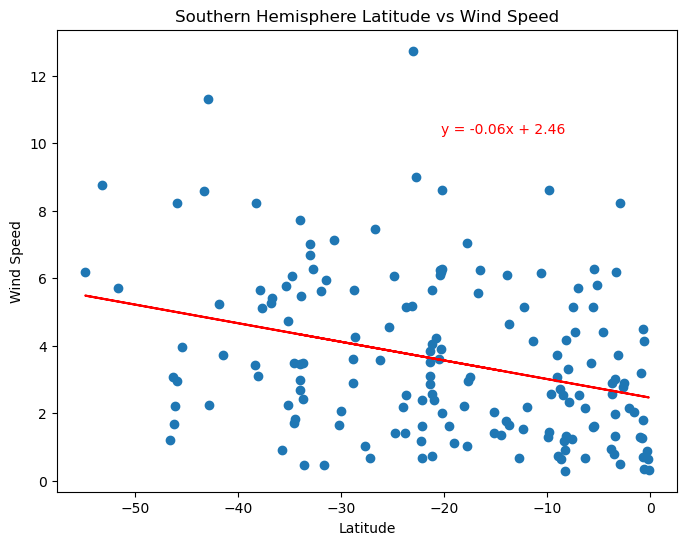

<Figure size 800x600 with 0 Axes>

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# equation appears on the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")


annotate_x = x_values.median()
annotate_y = y_values.min() + 10
plt.annotate(line_eq, (annotate_x, annotate_y), color='red')

rv = round ((southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])[0],2)

print(f"The r-value is: {rv}")
# print(f "The the regression equation is: {line_eq}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Hemisphere Latitude vs Wind Speed')
plt.show()


# Save the figure
plt.savefig("output_data/Fig8.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE